In [23]:
pip install pygame

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 24.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [11]:
import sys
import sklearn
import tensorflow as tf
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [12]:
np.random.seed(42)
tf.random.set_seed(42)

In [13]:
mpl.rc('animation', html='jshtml')

In [27]:
import gym
env = gym.make('CartPole-v1', render_mode="rgb_array")

def basic_policy(obs):
    try:
        angle = obs[2]
    except:
        angle = obs[0][2]
    return 0 if angle < 0 else 1

totals = []
for episode in range(500):
    episode_rewards = 0
    obs = env.reset()
    for step in range(200):
        action = basic_policy(obs)
        obs, reward, done, _, info = env.step(action)
        episode_rewards += reward
        if done:
            break
    totals.append(episode_rewards)

In [28]:
np.mean(totals), np.std(totals)

(41.318, 8.71578315471421)

In [29]:
frames = []
obs = env.reset()
for step in range(200):
    img = env.render()
    frames.append(img)
    action = basic_policy(obs)
    obs, reward, done, _, info = env.step(action)
    if done:
        break

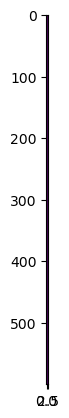

In [39]:
plt.imshow(frames[0][2])

In [31]:
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = animation.FuncAnimation(
        fig, update_scene, fargs=(frames, patch),
        frames=len(frames), repeat=repeat, interval=interval)
    plt.close()
    return anim

In [36]:
plot_animation(frames)

# 신경망 정책

In [48]:
dc = 0.95
rewards = [1,1,1,1,1,1,1]


for _ in range(2, 4) :
    print(_)


2
3


In [1]:
dc = 0.95 # 0.9 ~ 0.99
rewards = [-40, 50, 10, 20, -50, 40, -100, 53, 63, -100]

def fit(rewards, dc) :
    actList = []

    for idx in range(len(rewards), 2,  -1) :
        actList.append(predAct(rewards, idx, dc))
    actList.append(rewards[0] + (rewards[1] * dc))   
    actList.append(rewards[0])    
    
    return actList

def predAct(rewards, idx, dc) :
    res = 0
    defVal = rewards[0] + (rewards[1] * dc)
    for _ in range(2, idx+1):
        res += rewards[idx-1] * (dc**idx)
    
    res += defVal
    return res

print(fit(rewards, dc))

[-531.3632453145409, 325.14570250120295, 253.6289800082421, -411.50237765624985, 154.51837812499997, -147.25618749999995, 56.37037499999999, 24.647499999999997, 7.5, -40]


In [ ]:
    

act1 = rewards[0] + (rewards[1] * dc) + (rewards[2] * (dc**2)) + (rewards[3] * (dc**3))
act2 ..
act3 ..

# n개의 act를 정규화하여 평균을 넘을시 +, 못넘을시 -

(np.array(totals) - np.mean(totals)) / np.std(totals)

In [ ]:
# 신경망 네트워크 구성(keras, 입력 : 관찰값, 출력 : action)
# 에피소드별 행동, 이익, 계산
# 역전파를 통한 학습
# 

In [55]:
import keras as keras
from keras.layers import Conv2D, MaxPool2D,  \
    Dropout, Dense, Input, concatenate,      \
    GlobalAveragePooling2D, AveragePooling2D,\
    Flatten, BatchNormalization
from keras.initializers import glorot_uniform
from keras.initializers import Constant
from keras.utils import to_categorical
from keras.utils import np_utils
from keras.optimizers import SGD 
from keras.callbacks import LearningRateScheduler
import tensorflow as tf
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.datasets import cifar10, mnist, fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling, Resizing, RandomCrop, RandomFlip, RandomRotation
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import math
from IPython.display import Image
import math 

In [56]:
n_inputs = 4
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(5, activation='elu', input_shape=[n_inputs]))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 25        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


2022-12-30 12:10:04.830052: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# 신경망만 가지고 실행해 보기
import gym
def policy_network(model, steps=200):
    env = gym.make(‘CartPole-v1’, render_mode=“rgb_array”)
    obs = env.reset()
    frames = []
    for step in range(200):
        img = env.render()
        frames.append(img)
        left_probability = model.predict(obs.reshape(1, -1), verbose=0)
        action = int(np.random.rand() > left_probability)
        obs, reward, done, info = env.step(action)
        if done:
            break
    env.close()
    return frames

frames = policy_network(model)
print(‘실행횟수:’, len(frames))
reshaped = np.reshape(frames, [-1, 400, 600, 3])
plot_animation(reshaped)

n_inputs = 4
model =  tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(5, activation=‘elu’, input_shape=[n_inputs]))
model.add(tf.keras.layers.Dense(1, activation=‘sigmoid’))
model.summary()

In [ ]:
n_environments = 50
envs = [gym.make(“CartPole-v1”, render_mode=“rgb_array”) for _ in range(n_environments)]
observations = [env.reset() for env in envs]
y = np.array([([1.] if obs[2] < 0 else [0.]) for obs in observations])
left_pred = model(np.array(observations))
model.compile(optimizer = ‘rmsprop’, loss = ‘binary_crossentropy’)
tf.cast(observations, tf.float32).shape
model.fit(tf.cast(observations, tf.float32), y, epochs=100)
frames = policy_network(model)
reshaped = np.reshape(frames, [-1, 400, 600, 3])
plot_animation(reshaped)

In [ ]:
optimizer = tf.keras.optimizers.RMSprop()
loss_fn = tf.keras.losses.binary_crossentropy
for iteration in range(5000):
    target_probas = np.array([([1.] if obs[2] < 0 else [0.]) for obs in observations])
    with tf.GradientTape() as tape:
        left_probas = model(np.array(observations))
        loss = tf.reduce_mean(loss_fn(target_probas, left_probas)) # MSE
    print(“\rIteration: {}, Loss: {:.3f}“.format(iteration, loss.numpy()), end=“”)
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    actions = (np.random.rand(n_environments, 1) > left_probas.numpy()).astype(np.int32)
    for env_index, env in enumerate(envs):
        obs, reward, done, info = env.step(actions[env_index][0])
        observations[env_index] = obs if not done else env.reset()
for env in envs:
    env.close()